In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()
mpl.rcParams["font.sans-serif"]=[u"SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

In [3]:
path = "second_cars_info.csv"
data = pd.read_csv(path, encoding="gbk")

In [4]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万


In [5]:
data.columns

Index(['Brand', 'Name', 'Boarding_time', 'Km', 'Discharge', 'Sec_price',
       'New_price'],
      dtype='object')

In [6]:
"""
Brand:品牌
Name:车的详细名称
Boarding_time:上牌时间（当前数据集的获取时间-上牌时间=车的行驶时间）
Km:行驶里程
Discharge:标准
Sec_price:二手价格
New_price:新车价格
"""

'\nBrand:品牌\nName:车的详细名称\nBoarding_time:上牌时间（当前数据集的获取时间-上牌时间=车的行驶时间）\nKm:行驶里程\nDischarge:标准\nSec_price:二手价格\nNew_price:新车价格\n'

In [7]:
data.shape

(11281, 7)

In [8]:
#当前数据集，每个品牌有多少车
data.Brand.value_counts()

别克      1350
大众       991
奔驰       895
宝马       773
奥迪       758
福特       748
雪佛兰      507
保时捷      366
马自达      356
荣威       329
丰田       329
本田       276
现代       231
路虎       194
日产       171
斯柯达      169
起亚       162
比亚迪      149
江淮       139
玛莎拉蒂     113
捷豹       112
雷克萨斯     111
五菱       109
沃尔沃      109
凯迪拉克     104
MINI     104
标致       100
宾利        90
金杯        80
东风风行      70
        ... 
东风风神       7
迈凯伦        6
力帆         6
奔腾         5
启辰         4
巴博斯        4
迈巴赫        4
一汽         3
华泰         3
北汽绅宝       3
东风小康       3
红旗         3
观致         3
九龙         2
卡尔森        2
双龙         2
广汽吉奥       2
莲花         2
北汽幻速       2
北京         1
腾势         1
开瑞         1
东风风光       1
WEY        1
北汽制造       1
东风         1
昌河         1
世爵         1
路特斯        1
中欧房车       1
Name: Brand, Length: 104, dtype: int64

In [9]:
#现在需要提取Boarding_time中的年和月数据，但发现存在“未上牌”，需要过滤
np.sum(data.Boarding_time)

'2006年8月2007年1月2005年5月2013年10月2014年9月未上牌2014年8月2014年9月2013年7月2013年5月2017年8月2017年1月2015年12月2014年9月2014年7月2014年9月2006年4月2014年1月2014年3月2008年11月2008年1月2011年10月2011年5月2014年11月2009年8月2015年10月2011年2月2012年1月2011年1月2013年1月2016年6月2013年4月2016年5月2015年1月2015年1月2010年8月2009年12月2015年6月2007年8月2009年8月2011年2月2005年2月2011年1月2009年6月2016年9月2013年6月2009年3月2006年3月2010年11月2006年11月2013年8月2006年9月2016年3月2012年6月2016年11月2011年10月2006年5月2009年9月2017年6月2015年4月2014年11月2006年1月2010年8月2017年5月2017年1月2016年10月2012年1月2012年6月2014年5月2013年8月2010年10月2011年3月2012年3月2012年9月2014年7月2014年8月2009年8月2012年6月2016年3月2009年12月2016年8月2014年12月2006年6月2007年5月2015年12月2008年8月2013年3月2014年2月2010年10月2008年5月2010年2月2010年10月2009年6月2011年6月2007年5月2011年12月2012年9月2014年4月2009年2月2014年4月2007年5月2012年9月2012年9月2009年5月2005年1月2016年6月2014年4月2016年1月2016年6月2013年3月2014年10月2016年1月2003年5月2010年8月2005年11月2009年3月2007年8月2016年9月2010年12月2011年5月2012年9月2014年4月2002年6月2010年10月2006年12月2012年1月2011年8月2015年9月2016年11月2016年12月2017年1月2016年1月2011年3月2010年6月2015年7月2015年7月2013年1月2015年7月2016年7月201

In [11]:
#先统计有多少未上牌的数据
n = np.sum(data.Boarding_time=="未上牌")
n

93

In [12]:
#在当前数据集中占比如果
ratio = n / data.shape[0]
#千分之八，不多，可删
ratio

0.00824395000443223

In [13]:
#去除所有未上牌数据，一旦这样做，索引顺序会乱
data = data[data.Boarding_time != "未上牌"]
data

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万
6,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万
7,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万
8,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万
9,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万
10,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万


In [14]:
#处理索引
data.index = np.arange(0,data.shape[0])

In [15]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万


In [16]:
#提取年份数字放到新字段year中
data["year"] = data.Boarding_time.str[:4].astype("int")#astype是强制转换

In [17]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014


In [18]:
#提取月份数字放到新字段month中
data["month"] = data.Boarding_time.str[5:-1].astype("int")#astype是强制转换

In [19]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9


In [20]:
#新增一列，diff_months,从上牌到现在，车使用了多长时间，当前时间为2017年10月，算的是月份差
data["diff_months"] = (2017-data.year)*12 + (10-data.month)

In [21]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37


In [22]:
#处理KM列，去除万公里,保存在新字段Km_new中
data["Km_new"] = data.Km.str[:-3]

In [23]:
data["Km_new"].astype("float")

ValueError: could not convert string to float: '百'

In [26]:
#发现数据集Km字段中还包含有“百公里内”的数据，需要过滤
data[data.Km_new.str.contains("百")]

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
222,奥迪,奥迪Q5 2017款 40TFSI 舒适型,2017年8月,百公里内,国5,39.38,50.96万,2017,8,2,百
568,奥迪,奥迪A7 2016款 50 TFSI quattro 舒适型,2017年8月,百公里内,国5,69.88,88.79万,2017,8,2,百
745,奥迪,奥迪A7 2016款 50 TFSI quattro 舒适型,2016年11月,百公里内,国5,67.88,88.79万,2016,11,11,百
758,阿斯顿·马丁,阿斯顿·马丁V8 Vantage 2016款 V8 Vantage Edition 5五周年纪念版,2017年9月,百公里内,欧4,196.80,237.50万,2017,9,1,百
760,阿斯顿·马丁,阿斯顿·马丁V8 Vantage 2016款 4.7L Coupe,2017年8月,百公里内,欧4,196.90,215.79万,2017,8,2,百
781,阿斯顿·马丁,阿斯顿·马丁Virage 2012款 6.0L COUPE,2017年2月,百公里内,欧4,209.80,466.75万,2017,2,8,百
789,阿尔法·罗密欧,阿尔法·罗密欧Giulia 2017款 280HP Milano 限量版,2017年9月,百公里内,国5,40.00,47.09万,2017,9,1,百
790,阿尔法·罗密欧,阿尔法·罗密欧Giulia 2017款 280HP Milano 限量版,2017年8月,百公里内,国5,40.00,47.09万,2017,8,2,百
794,阿尔法·罗密欧,阿尔法·罗密欧Giulia 2017款 280HP Milano 限量版,2017年5月,百公里内,国5,40.00,47.09万,2017,5,5,百
797,宝马,宝马X5 2015款 xDrive35i 中东版,2017年8月,百公里内,--,70.80,99.65万,2017,8,2,百


In [28]:
#先获取所有不带“百”字数据的索引
index = data[~(data.Km_new.str.contains("百"))].index
#然后使用loc字段来解决问题，保留不带“百”字的数据
data = data.loc[index,:]

In [30]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81


In [31]:
#loc举例  DataFrame切片使用loc关键字  loc[索引,列]
data.loc[[0,1,2,3],["Brand","Name","Boarding_time"]]

,Brand,Name,Boarding_time
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月


In [32]:
#loc举例
data.loc[[0,1,2,3],:]

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80


In [33]:
#已经去除掉带有“百”字的内容，可以再次进行数据转换了
data["Km_new"] = data.Km_new.astype("float")

In [34]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81


In [35]:
#新增New_price_new字段，将New_price中的数值提取出来放入到新增列中
data["New_price_new"] = data.New_price.str[:-1]

In [36]:
#数据转换报错
data.New_price_new.astype("float")

ValueError: could not convert string to float: '暂'

In [37]:
#发现数据无法转换的原因是里面含有“斩无”的数据，过滤之
data[data.New_price_new.str.contains("暂")]

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new,New_price_new
776,阿斯顿·马丁,阿斯顿·马丁Vanquish 2013款 硬顶版 6.0L,2013年7月,1.50万公里,欧4,295.00,暂无,2013,7,51,1.50,暂
1218,宝马,宝马X6 2013款 美规版 xDrive35i,2013年5月,3.70万公里,--,53.50,暂无,2013,5,53,3.70,暂
1269,宝马,宝马5系 2006款 525i,2006年11月,11.00万公里,国2,8.00,暂无,2006,11,131,11.00,暂
1301,宝马,宝马5系 2006款 525i,2006年10月,12.00万公里,国2,8.00,暂无,2006,10,132,12.00,暂
1394,宝马,宝马X5 2013款 xDrive35i 美规版,2015年5月,3.30万公里,欧4,69.80,暂无,2015,5,29,3.30,暂
2253,奔驰,奔驰G级 2016款 G 500 平行进口 欧版,2016年12月,0.50万公里,欧4,145.80,暂无,2016,12,10,0.50,暂
2265,奔驰,凌特(进口) 2010款 A2 高顶中轴距汽油型7座,2012年4月,4.00万公里,欧4,56.80,暂无,2012,4,66,4.00,暂
3307,别克,GL8 2007款 陆尊 3.0 LT 豪华版,2007年2月,9.00万公里,国3,5.80,暂无,2007,2,128,9.00,暂
4241,保时捷,保时捷Cayenne 2014款 3.6L 手自一体 美规版 汽油,2016年10月,0.88万公里,欧4,88.80,暂无,2016,10,12,0.88,暂
4333,保时捷,保时捷Cayenne 2013款 3.6L 手自一体 美规版,2013年5月,6.00万公里,欧4,61.80,暂无,2013,5,53,6.00,暂


In [39]:
#去除暂无的数据
data = data.loc[data.New_price!="暂无",:]

In [42]:
data.New_price_new.astype("float")

0         50.89
1         50.89
2         54.24
3        101.06
4         54.99
5         69.25
6        114.84
7         79.02
8        130.04
9        275.49
10        98.76
11        54.25
12        36.23
13        35.81
14        52.31
15        92.95
16        35.81
17        34.30
18        50.89
19        78.29
20       252.70
21       252.70
22        54.99
23        50.89
24        22.77
25        57.31
26        46.41
27        35.81
28        46.98
29        37.88
          ...  
11158      9.42
11159     11.92
11160      8.56
11161      8.66
11162     11.59
11163     10.72
11164     11.48
11165     11.92
11166      8.56
11167     11.72
11168     17.56
11169      9.42
11170      8.87
11171      7.96
11172     13.66
11173      8.43
11174      8.99
11175      7.90
11176      6.49
11177     10.07
11178     10.18
11179     10.07
11180     10.40
11181      6.22
11182     11.48
11183      9.63
11184      6.22
11185     11.48
11186      8.99
11187    168.25
Name: New_price_new, Len

In [41]:
data.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new,New_price_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00,50.89
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00,50.89
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00,54.24
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80,101.06
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81,54.99


In [43]:
#不同价格区间，二手车的数量及占比
#如何获取不同价格的二手车在当前数据集中有多少辆
data.Sec_price.value_counts()#这不是我们想要的，我们要的是区间价格二手车的数量，如[2,5][5,8][8,15]

4.50      91
4.80      83
8.80      79
5.50      75
4.88      72
7.80      71
4.98      69
5.80      68
5.20      64
5.00      63
6.50      62
4.38      62
8.50      59
9.80      58
4.20      53
3.50      52
7.50      52
3.80      50
5.98      48
10.80     48
14.80     46
12.80     45
3.98      45
6.80      45
4.60      45
7.98      45
7.88      45
3.88      45
3.00      44
7.00      44
          ..
24.51      1
57.98      1
15.96      1
52.58      1
388.00     1
13.53      1
25.75      1
69.00      1
106.58     1
543.00     1
8.19       1
4.31       1
18.10      1
129.60     1
8.27       1
1.79       1
2.24       1
28.56      1
54.90      1
10.35      1
66.30      1
29.49      1
38.15      1
9.43       1
34.28      1
10.45      1
4.67       1
16.55      1
18.85      1
15.10      1
Name: Sec_price, Length: 1899, dtype: int64

In [44]:
#先获取当前数据集中最便宜和最贵的二手车价格
sec_price_min = data.Sec_price.min()
sec_price_max = data.Sec_price.max()

In [45]:
#使用pandas中的cut函数,实现不同区间车价格的展示
#cut,第一个参数是数据，第二参数bins是想要的区间
price_cut = pd.cut(data.Sec_price,bins=[sec_price_min,3,5,8,15,30,55,100,sec_price_max])

In [46]:
price_cut #通过上面的cut函数，并不能帮助完成不同价格区间的二手车数量统计，只是告诉我们，每一条记录属于哪个区间

0            (5.0, 8.0]
1           (8.0, 15.0]
2            (3.0, 5.0]
3          (30.0, 55.0]
4          (30.0, 55.0]
5          (30.0, 55.0]
6         (55.0, 100.0]
7          (30.0, 55.0]
8         (55.0, 100.0]
9        (100.0, 808.0]
10        (55.0, 100.0]
11         (30.0, 55.0]
12         (15.0, 30.0]
13         (15.0, 30.0]
14         (30.0, 55.0]
15          (8.0, 15.0]
16         (15.0, 30.0]
17         (15.0, 30.0]
18          (8.0, 15.0]
19          (8.0, 15.0]
20        (55.0, 100.0]
21        (55.0, 100.0]
22         (30.0, 55.0]
23         (15.0, 30.0]
24          (8.0, 15.0]
25         (15.0, 30.0]
26         (15.0, 30.0]
27          (8.0, 15.0]
28         (15.0, 30.0]
29         (15.0, 30.0]
              ...      
11158        (5.0, 8.0]
11159       (8.0, 15.0]
11160        (5.0, 8.0]
11161        (5.0, 8.0]
11162        (5.0, 8.0]
11163        (5.0, 8.0]
11164       (8.0, 15.0]
11165       (8.0, 15.0]
11166        (5.0, 8.0]
11167        (5.0, 8.0]
11168       (8.0

In [48]:
price_state = price_cut.value_counts()

In [49]:
price_state

(8.0, 15.0]       2221
(15.0, 30.0]      2069
(5.0, 8.0]        1956
(3.0, 5.0]        1790
(30.0, 55.0]      1069
(0.65, 3.0]        810
(55.0, 100.0]      598
(100.0, 808.0]     468
Name: Sec_price, dtype: int64

In [50]:
#列表表达式举例
[i for i in np.arange(10)*2]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [51]:
price_state.sum()#目前一共有多少二手车

10981

In [52]:
#计算不同价格区间的车在当前数据集中占比
percents = [str(round(i*100,2))+"%" for i in price_state/price_state.sum()]

In [53]:
percents

['20.23%', '18.84%', '17.81%', '16.3%', '9.73%', '7.38%', '5.45%', '4.26%']

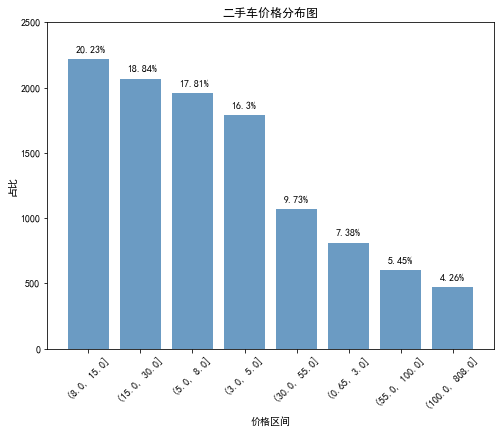

In [62]:
#画图展示
X = np.arange(len(price_state))
Y = price_state
plt.figure(figsize=(8,6))
plt.bar(X,Y,color="steelblue",alpha=0.8)
#将刻度改成价格区间，rotation=45表示文字旋转45度
plt.xticks(np.arange(len(price_state)),price_state.index, rotation=45)
plt.xlabel("价格区间")
plt.ylabel("占比")
plt.title("二手车价格分布图")
plt.ylim([0,2500])
#计算不同价格区间车数量的占比
percents = [str(round(i*100,2))+"%" for i in price_state/price_state.sum()]
for x,y,z in zip(X,Y,percents):
    plt.text(x-0.25,y+50,z)